In [147]:
using Clapeyron
using Plots
using CSV
using DataFrames
using LaTeXStrings
using Measures

In [149]:
model_mix = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1]),("Water",["H2O"=>1]),("Sulphur Dioxide",["SO2"=>1])];

        userlocations = (Mw = [16.02285, 14.02658, 31.03392, 18.01528, 64.066],

        epsilon = [284.78 348.39 528.21 339.89 259.90;
                   348.39 473.39 423.17 423.63 301.96;
                   528.21 423.17 407.22 358.02 302.89;
                   339.89 423.63 358.02 266.68 239.53;
                   259.90 301.96 302.89 239.53 237.54],
        sigma = [3.2477, 4.8801, 3.4054, 3.0063, 3.1605],
        lambda_a = [6, 6, 6, 6, 6],
        lambda_r = [10.354 14.063 52.305 13.085 12.412;
                    14.063 19.871 21.230 100.00 17.354;
                    52.305 21.230 22.699 19.619 18.511;
                    13.085 100.00 19.619 17.020 16.085;
                    12.412 17.354 18.511 16.085 15.213],
        vst = [1, 1, 2, 1, 3],
        S = [0.79675, 0.22932, 0.58538, 1, 0.62547],
        n_H=[2, 0, 1, 2, 1],
        n_e=[1, 0, 2, 2, 1],
        n_a1=[0, 0, 0, 1, 1],
        n_a1e=[0, 0, 0, 1, 1],
        # n_a2=[0, 0, 0, 0, 1],
        # n_a2e=[1, 0, 0, 0, 0],
        epsilon_assoc = Dict([(("NH2","H"),("NH2","e")) => 1070.80,
                              (("NH2","H"),("CH2OH","e")) => 629.88,
                              (("NH2","H"),("H2O","e")) => 1364.40,
                              (("NH2","H"),("SO2","e")) => 1011.60,
                              (("CH2OH","H"),("NH2","e")) => 2403.78,
                              (("CH2OH","H"),("CH2OH","e")) => 2097.90,
                              (("CH2OH","H"),("H2O","e")) => 600.00,
                              (("CH2OH","H"),("SO2","e")) => 1415.90,
                              (("H2O","H"),("NH2","e")) => 1877.50,
                              (("H2O","H"),("CH2OH","e")) => 2000.60,
                              (("H2O","H"),("H2O","e")) => 1985.40,
                              (("H2O","H"),("SO2","e")) => 1343.90,
                              (("SO2","H"),("NH2","e")) => 1011.60,
                              (("SO2","H"),("CH2OH","e")) => 1415.90,
                              (("SO2","H"),("H2O","e")) => 1343.90,
                              (("SO2","H"),("SO2","e")) => 955.58,
                              (("SO2","a1"),("H2O","a1e")) => 671.95,
                              (("H2O","a1"),("SO2","a1e")) => 671.95]),
                              #(("CO2","a1"),("NH2","a1e")) => 3313,
                
                              #(("CO2","a1"),("H2O","a1e")) => 1398.1,
                 
                              #(("CO2","a2"),("NH2","a2e")) => 4943.6]),

        bondvol = Dict([(("NH2","H"),("NH2","e")) => 95.225e-30,
                        (("NH2","H"),("CH2OH","e")) => 346.08e-30,
                        (("NH2","H"),("H2O","e")) => 22.450e-30,
                        (("NH2","H"),("SO2","e")) => 345.890e-30,
                        (("CH2OH","H"),("NH2","e")) => 26.192e-30,
                        (("CH2OH","H"),("CH2OH","e")) => 62.309e-30,
                        (("CH2OH","H"),("H2O","e")) => 490.19e-30,
                        (("CH2OH","H"),("SO2","e")) => 303.270e-30,
                        (("H2O","H"),("NH2","e")) => 459.18e-30,
                        (("H2O","H"),("CH2OH","e")) => 130.02e-30,
                        (("H2O","H"),("H2O","e")) => 101.69e-30,
                        (("H2O","H"),("SO2","e")) => 353.41e-30,
                        (("SO2","H"),("NH2","e")) => 345.890e-30,
                        (("SO2","H"),("CH2OH","e")) => 303.270e-30,
                        (("SO2","H"),("H2O","e")) => 353.41e-30,
                        (("SO2","H"),("SO2","e")) => 849.99e-30,
                        (("SO2","a1"),("H2O","a1e")) => 91.419e-30,
                        (("H2O","a1"),("SO2","a1e")) => 91.4e-30])));
        
                              #(("CO2","a1"),("NH2","a1e")) => 3280.3e-30,
                
                              #(("CO2","a1"),("H2O","a1e")) => 91.419e-30,
                 
                              #(("CO2","a2"),("NH2","a2e")) => 142.64e-30])));

In [150]:
data1 = CSV.read("SO2_EXP_0.1wt.csv", DataFrame; header=false)
data2 = CSV.read("SO2_EXP_0.2wt.csv", DataFrame; header=false)
data3 = CSV.read("SO2_EXP_0.3wt.csv", DataFrame; header=false)
data4 = CSV.read("SO2_EXP_0.4wt.csv", DataFrame; header=false)
data5 = CSV.read("SO2_EXP_0.5wt.csv", DataFrame; header=false)

@show data1, data2, data3, data4, data5

data1 .= convert.(Float64, data1)
data2 .= convert.(Float64, data2)
data3 .= convert.(Float64, data3)
data4 .= convert.(Float64, data4)
data5 .= convert.(Float64, data5)

#Data is in the order temp, partial pressure, wtMEA, Loading SO2


(data1, data2, data3, data4, data5) = (15×4 DataFrame
 Row │ Column1  Column2  Column3  Column4
     │ Int64    Int64    Float64  Float64
─────┼──────────────────────────────────────
   1 │     293    13289      0.1  0.0341914
   2 │     293    26577      0.1  0.0463291
   3 │     293    39866      0.1  0.0683923
   4 │     293    53154      0.1  0.108695
   5 │     293    67945      0.1  0.122807
   6 │     313    13289      0.1  0.0285087
   7 │     313    26577      0.1  0.0386155
   8 │     313    39866      0.1  0.0570175
   9 │     313    53154      0.1  0.0906749
  10 │     313    67945      0.1  0.102498
  11 │     333    13289      0.1  0.0237414
  12 │     333    26577      0.1  0.0322273
  13 │     333    39866      0.1  0.0475781
  14 │     333    53154      0.1  0.0756101
  15 │     333    67945      0.1  0.0855262, 15×4 DataFrame
 Row │ Column1  Column2  Column3  Column4
     │ Int64    Int64    Float64  Float64
─────┼──────────────────────────────────────
   1 │     293 

Row,Column1,Column2,Column3,Column4
,Int64,Int64,Float64,Float64
1,293,13289,0.5,0.118421
2,293,26577,0.5,0.213863
3,293,39866,0.5,0.252383
4,293,53154,0.5,0.293096
5,293,67945,0.5,0.426487
6,313,13289,0.5,0.0987794
7,313,26577,0.5,0.178585
8,313,39866,0.5,0.194794
9,313,53154,0.5,0.24466


In [151]:
wt_MEA = [0.1, 0.2, 0.3, 0.4, 0.5]
wt_H2O = 1 .- wt_MEA

mw_MEA = 61.08
mw_H2O = 18.01528

x_MEA = (wt_MEA ./ mw_MEA) .* (1 ./ ((wt_MEA ./ mw_MEA) .+ (wt_H2O ./ mw_H2O)))
x_H2O = 1 .- x_MEA
solvrat = x_H2O ./ x_MEA


5-element Vector{Float64}:
 30.514096922168292
 13.56182085429702
  7.911062165006595
  5.085682820361383
  3.3904552135742545

In [152]:
load = LinRange(0, 0.5, 100) #these are the ratio of SO2 mols to MEA mols in solution

N = length(load)

# intialise new composition vectors
x_MEA = zeros(N, 5)
x_H2O = zeros(N, 5)
x_SO2 = zeros(N, 5)
z = zeros(N, 15)

# calculate the new liquid compositions at these loadings
for i in 1:5
x_MEA[:,i] = 1 ./ (1 .+ load .+ solvrat[i])
x_SO2[:,i] = x_MEA[:,i] .* load
x_H2O[:,i] = 1 .- x_MEA[:,i] .- x_SO2[:,i]
ind = 3*(i-1) + 1
z[:, ind] = x_MEA[:,i]
z[:, ind + 1] = x_H2O[:,i]
z[:, ind + 2] = x_SO2[:,i]
end
@show z
# each 3 columns represents the composition under loading at a different MEA wt in solution

z = [0.03173183107451064 0.9682681689254894 0.0 0.06867273056067792 0.9313272694393221 0.0 0.11222006776329789 0.8877799322367022 0.0 0.16432009842087328 0.8356799015791267 0.0 0.22776681490981512 0.7722331850901849 0.0; 0.031726746489863365 0.9681130174167535 0.00016023609338314832 0.06864892092002327 0.9310043673581584 0.00034671172181829934 0.11215650104538166 0.8872770519796417 0.0005664469749766751 0.16418384233435054 0.8349869463407285 0.0008292113249209624 0.22750510726508033 0.7713458770416617 0.0011490156932579816; 0.031721663534422996 0.967957915621795 0.0003204208437820505 0.06862512778380933 0.9306816891072632 0.000693183108927367 0.11209300630104642 0.886774741110054 0.001132252588899459 0.1640478120307861 0.8342951393628423 0.001657048606371577 0.22724400034248815 0.7704606057146585 0.0022953939428534157; 0.031716582207406606 0.9678028635167236 0.00048055427586979707 0.0686013511348812 0.9303592344539843 0.0010394144111345637 0.11202958340812283 0.886272998661451 0.001697

100×15 Matrix{Float64}:
 0.0317318  0.968268  0.0          …  0.227767  0.772233  0.0
 0.0317267  0.968113  0.000160236     0.227505  0.771346  0.00114902
 0.0317217  0.967958  0.000320421     0.227244  0.770461  0.00229539
 0.0317166  0.967803  0.000480554     0.226983  0.769577  0.00343914
 0.0317115  0.967648  0.000640636     0.226724  0.768696  0.00458027
 0.0317064  0.967493  0.000800667  …  0.226464  0.767817  0.00571879
 0.0317013  0.967338  0.000960647     0.226206  0.76694   0.00685471
 0.0316963  0.967183  0.00112058      0.225947  0.766065  0.00798804
 0.0316912  0.967028  0.00128045      0.22569   0.765191  0.00911878
 0.0316861  0.966874  0.00144028      0.225433  0.76432   0.0102469
 0.0316811  0.966719  0.00160005   …  0.225177  0.763451  0.0113726
 0.031676   0.966564  0.00175978      0.224921  0.762584  0.0124956
 0.0316709  0.96641   0.00191945      0.224666  0.761718  0.0136161
 ⋮                                 ⋱                      
 0.0312905  0.954803  0.0139069

In [153]:

T = [293, 313, 333]

pvap1 = zeros(N, 3)
y1 = zeros(N, 3, 3)
partial1 = zeros(N, 3)

pvap2 = zeros(N, 3)
y2 = zeros(N, 3, 3)
partial2 = zeros(N, 3)

pvap3 = zeros(N, 3)
y3 = zeros(N, 3, 3)
partial3 = zeros(N, 3)

pvap4 = zeros(N, 3)
y4 = zeros(N, 3, 3)
partial4 = zeros(N, 3)

pvap5 = zeros(N, 3)
y5 = zeros(N, 3, 3)
partial5 = zeros(N, 3)

for j in 1:3
        
    for i in 1:N
        x_bub = z[i, 1:3]
        calc = bubble_pressure(model_mix, T[j], x_bub)
        pvap1[i, j] = calc[1]
        y1[i, 1, j] = calc[4][1]
        y1[i, 2, j] = calc[4][2]
        y1[i, 3, j] = calc[4][3]
    end

end

for j in 1:3
        
    for i in 1:N
        x_bub = z[i, 4:6]
        calc = bubble_pressure(model_mix, T[j], x_bub)
        pvap2[i, j] = calc[1]
        y2[i, 1, j] = calc[4][1]
        y2[i, 2, j] = calc[4][2]
        y2[i, 3, j] = calc[4][3]
    end

end

for j in 1:3
        
    for i in 1:N
        x_bub = z[i, 7:9]
        calc = bubble_pressure(model_mix, T[j], x_bub)
        pvap3[i, j] = calc[1]
        y3[i, 1, j] = calc[4][1]
        y3[i, 2, j] = calc[4][2]
        y3[i, 3, j] = calc[4][3]
    end

end

for j in 1:3
        
    for i in 1:N
        x_bub = z[i, 10:12]
        calc = bubble_pressure(model_mix, T[j], x_bub)
        pvap4[i, j] = calc[1]
        y4[i, 1, j] = calc[4][1]
        y4[i, 2, j] = calc[4][2]
        y4[i, 3, j] = calc[4][3]
    end

end

for j in 1:3
        
    for i in 1:N
        x_bub = z[i, 13:15]
        calc = bubble_pressure(model_mix, T[j], x_bub)
        pvap5[i, j] = calc[1]
        y5[i, 1, j] = calc[4][1]
        y5[i, 2, j] = calc[4][2]
        y5[i, 3, j] = calc[4][3]
    end

end

partial1T1 = pvap1[2:100, 1] .* y5[2:100, 3, 1]
partial1T2 = pvap1[2:100, 2] .* y5[2:100, 3, 2]
partial1T3 = pvap1[2:100, 3] .* y5[2:100, 3, 3]

partial2T1 = pvap2[2:100, 1] .* y5[2:100, 3, 1]
partial2T2 = pvap2[2:100, 2] .* y5[2:100, 3, 2]
partial2T3 = pvap2[2:100, 3] .* y5[2:100, 3, 3]

partial3T1 = pvap3[2:100, 1] .* y5[2:100, 3, 1]
partial3T2 = pvap3[2:100, 2] .* y5[2:100, 3, 2]
partial3T3 = pvap3[2:100, 3] .* y5[2:100, 3, 3]

partial4T1 = pvap4[2:100, 1] .* y5[2:100, 3, 1]
partial4T2 = pvap4[2:100, 2] .* y5[2:100, 3, 2]
partial4T3 = pvap4[2:100, 3] .* y5[2:100, 3, 3]

partial5T1 = pvap5[2:100, 1] .* y5[2:100, 3, 1]
partial5T2 = pvap5[2:100, 2] .* y5[2:100, 3, 2]
partial5T3 = pvap5[2:100, 3] .* y5[2:100, 3, 3]


loadfil = load[2:100];

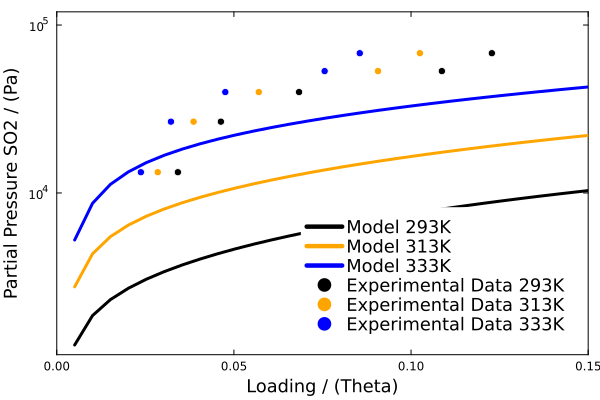

In [154]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           yaxis =:log,
           legend =:bottomright,
           legend_font = font(12),
           xlims = (0, 0.15))

plot!(plt, loadfil, partial1T1, 
      color = "black", 
      line = (:path, 3), 
      label = "Model 293K")

plot!(plt, loadfil, partial1T2, 
      color = "orange", 
      line = (:path, 3), 
      label = "Model 313K")

plot!(plt, loadfil, partial1T3, 
      color = "blue", 
      line = (:path, 3), 
      label = "Model 333K")

plot!(plt, data1[1:5,4], data1[1:5, 2], 
      seriestype = :scatter, 
      color = "black", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 293K")

plot!(plt, data1[6:10,4], data1[6:10, 2], 
      seriestype = :scatter, 
      color = "orange", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 313K")

plot!(plt, data1[11:15,4], data1[11:15, 2], 
      seriestype = :scatter, 
      color = "blue", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 333K")


xlabel!(plt, "Loading / (Theta)", xguidefontsize = 12)
ylabel!(plt, "Partial Pressure SO2 / (Pa)", yguidefontsize = 12)

#savefig(plt, "Loading_T2")

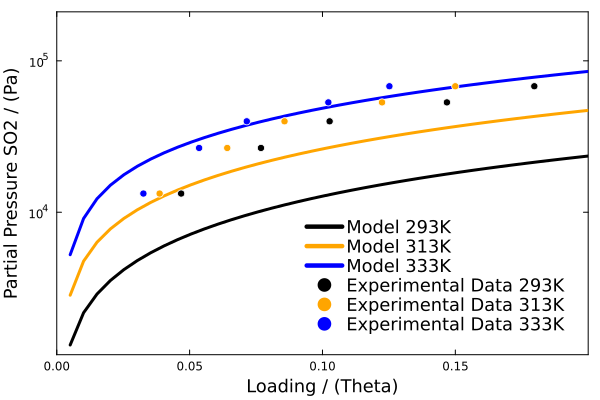

In [155]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           yaxis =:log,
           legend =:bottomright,
           legend_font = font(12),
           xlims = (0, 0.2))

plot!(plt, loadfil, partial2T1, 
      color = "black", 
      line = (:path, 3), 
      label = "Model 293K")

plot!(plt, loadfil, partial2T2, 
      color = "orange", 
      line = (:path, 3), 
      label = "Model 313K")

plot!(plt, loadfil, partial2T3, 
      color = "blue", 
      line = (:path, 3), 
      label = "Model 333K")

plot!(plt, data2[1:5,4], data2[1:5, 2], 
      seriestype = :scatter, 
      color = "black", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 293K")

plot!(plt, data2[6:10,4], data2[6:10, 2], 
      seriestype = :scatter, 
      color = "orange", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 313K")

plot!(plt, data2[11:15,4], data2[11:15, 2], 
      seriestype = :scatter, 
      color = "blue", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 333K")


xlabel!(plt, "Loading / (Theta)", xguidefontsize = 12)
ylabel!(plt, "Partial Pressure SO2 / (Pa)", yguidefontsize = 12)


In [169]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           yaxis =:log,
           legend =:bottomright,
           legend_font = font(12),
           xlims = (0, 0.25))

plot!(plt, loadfil, partial3T1, 
      color = "black", 
      line = (:path, 3), 
      label = "Model 293K")

plot!(plt, loadfil, partial3T2, 
      color = "orange", 
      line = (:path, 3), 
      label = "Model 313K")

plot!(plt, loadfil, partial3T3, 
      color = "blue", 
      line = (:path, 3), 
      label = "Model 333K")

plot!(plt, data3[1:5,4], data3[1:5, 2], 
      seriestype = :scatter, 
      color = "black", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 293K")

plot!(plt, data3[6:10,4], data3[6:10, 2], 
      seriestype = :scatter, 
      color = "orange", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 313K")

plot!(plt, data3[11:15,4], data3[11:15, 2], 
      seriestype = :scatter, 
      color = "blue", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 333K")


xlabel!(plt, "Loading / (Theta)", xguidefontsize = 12)
ylabel!(plt, "Partial Pressure SO2 / (Pa)", yguidefontsize = 12)
savefig(plt, "SO2_Loading_Association_0.3wt_298K.png")

"C:\\Users\\gk321\\OneDrive - Imperial College London\\Documents\\4th year\\Research Project\\Working Julia\\SO2_Loading_Association_0.3wt_298K.png"

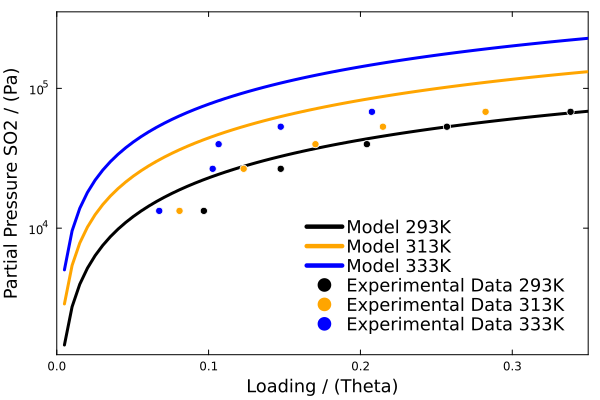

In [157]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           yaxis =:log,
           legend =:bottomright,
           legend_font = font(12),
           xlims = (0, 0.35))

plot!(plt, loadfil, partial4T1, 
      color = "black", 
      line = (:path, 3), 
      label = "Model 293K")

plot!(plt, loadfil, partial4T2, 
      color = "orange", 
      line = (:path, 3), 
      label = "Model 313K")

plot!(plt, loadfil, partial4T3, 
      color = "blue", 
      line = (:path, 3), 
      label = "Model 333K")

plot!(plt, data4[1:5,4], data4[1:5, 2], 
      seriestype = :scatter, 
      color = "black", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 293K")

plot!(plt, data4[6:10,4], data4[6:10, 2], 
      seriestype = :scatter, 
      color = "orange", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 313K")

plot!(plt, data4[11:15,4], data4[11:15, 2], 
      seriestype = :scatter, 
      color = "blue", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 333K")


xlabel!(plt, "Loading / (Theta)", xguidefontsize = 12)
ylabel!(plt, "Partial Pressure SO2 / (Pa)", yguidefontsize = 12)

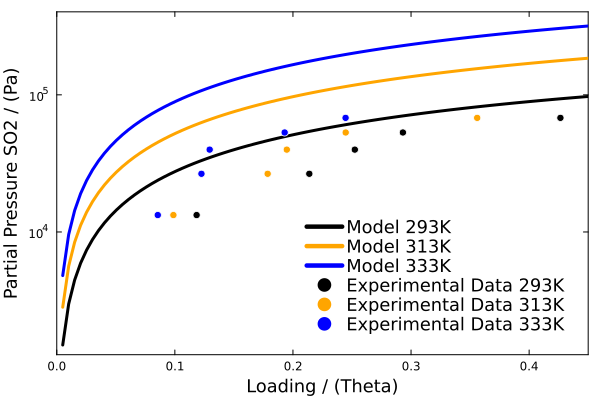

In [158]:
plt = plot(grid = :off, 
           framestyle = :box, 
           foreground_color_legend = nothing,
           yaxis =:log,
           legend =:bottomright,
           legend_font = font(12),
           xlims = (0, 0.45))

plot!(plt, loadfil, partial5T1, 
      color = "black", 
      line = (:path, 3), 
      label = "Model 293K")

plot!(plt, loadfil, partial5T2, 
      color = "orange", 
      line = (:path, 3), 
      label = "Model 313K")

plot!(plt, loadfil, partial5T3, 
      color = "blue", 
      line = (:path, 3), 
      label = "Model 333K")

plot!(plt, data5[1:5,4], data5[1:5, 2], 
      seriestype = :scatter, 
      color = "black", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 293K")

plot!(plt, data5[6:10,4], data5[6:10, 2], 
      seriestype = :scatter, 
      color = "orange", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 313K")

plot!(plt, data5[11:15,4], data5[11:15, 2], 
      seriestype = :scatter, 
      color = "blue", 
      markerstrokecolor = "white", 
      line = (:scatter, 0.4), 
      label = "Experimental Data 333K")


xlabel!(plt, "Loading / (Theta)", xguidefontsize = 12)
ylabel!(plt, "Partial Pressure SO2 / (Pa)", yguidefontsize = 12)